XYZ is a courier company. As we appreciate that human capital plays an important role in collection, transportation and delivery. The company is passing through genuine issue of Absenteeism. The company has shared it dataset and requested to have an answer on the following areas: 
1. What changes company should bring to reduce the number of absenteeism?  
2. How much losses every month can we project in 2011 if same trend of absenteeism continues? 

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [228]:
raw_xls_data = pd.read_excel("Absenteeism_at_work_Project.xls")
#profile = raw_csv_data.profile_report(title="Employee Absenteeism Report", plot={'histogram':{'bins':50}})
#profile.to_file("EmployeeAbsenteeismReport.html")

# Exploratory Analysis

In [229]:
raw_xls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [230]:
pd.options.display.max_columns = None #Set this since there are huge number of columns

In [231]:
raw_xls_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [232]:
raw_xls_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [233]:
raw_xls_data.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [234]:
def print_unique(df, variable):
    print("The number of unique values in the variable:", variable)
    print(np.sort(df[variable].unique()))

In [235]:
for col in raw_xls_data.columns:
    print_unique(raw_xls_data, col)

The number of unique values in the variable: ID
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
The number of unique values in the variable: Reason for absence
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 21. 22. 23. 24. 25. 26. 27. 28. nan]
The number of unique values in the variable: Month of absence
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]
The number of unique values in the variable: Day of the week
[2 3 4 5 6]
The number of unique values in the variable: Seasons
[1 2 3 4]
The number of unique values in the variable: Transportation expense
[118. 155. 157. 179. 184. 189. 225. 228. 231. 233. 235. 246. 248. 260.
 268. 279. 289. 291. 300. 330. 361. 369. 378. 388.  nan]
The number of unique values in the variable: Distance from Residence to Work
[ 5. 10. 11. 12. 13. 14. 15. 16. 17. 20. 22. 25. 26. 27. 29. 31. 35. 36.
 42. 45. 48. 49. 50. 51. 52. nan]
The number of unique v

raw_xls_data["Reason for absence"] = raw_xls_data["Reason for absence"].replace(np.nan,-1) 
#There are nan in this categorical variable, we shall replace Nan as -1
raw_xls_data["Month of absence"] = raw_xls_data["Month of absence"].replace(0,8) 
#Having 0 and 12 as months does not make sense, we shall replace 0 as Nan so that we can impute valid values in missing value analysis

In [236]:
raw_xls_data.groupby('ID')['Absenteeism time in hours'].sum()

ID
1     121.0
2      25.0
3     448.0
4       0.0
5     104.0
6      72.0
7     150.0
8       0.0
9     262.0
10    170.0
11    450.0
12     34.0
13    175.0
14    356.0
15    253.0
16     16.0
17    126.0
18    110.0
19      6.0
20    295.0
21     16.0
22    253.0
23     32.0
24    238.0
25     42.0
26     83.0
27     19.0
28    345.0
29     21.0
30     31.0
31     16.0
32     16.0
33     73.0
34    341.0
35      0.0
36    311.0
Name: Absenteeism time in hours, dtype: float64

In [237]:
raw_xls_data["ID"].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [238]:
raw_xls_data['Absenteeism time in hours'].value_counts()

8.0      199
2.0      155
3.0      110
1.0       88
4.0       60
0.0       36
16.0      19
24.0      16
40.0       7
5.0        7
32.0       5
64.0       3
80.0       3
120.0      3
56.0       2
112.0      2
104.0      1
7.0        1
48.0       1
Name: Absenteeism time in hours, dtype: int64

In [239]:
raw_xls_data[raw_xls_data["ID"] == 3]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
13,3,11.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
14,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,NaN,4.0
16,3,23.0,7.0,6,1,NaN,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
17,3,21.0,7.0,2,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,8.0
21,3,11.0,8.0,2,1,179.0,51.0,18.0,38.0,205917.0,92.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
29,3,23.0,8.0,6,1,179.0,51.0,18.0,38.0,205917.0,92.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
30,3,18.0,8.0,2,1,179.0,51.0,18.0,38.0,205917.0,92.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,8.0
34,3,23.0,8.0,2,1,179.0,51.0,18.0,38.0,205917.0,92.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0


From the above data it looks like the employee with ID 3 has more instances of Absenteeism. But this has nothing to do in tackling our problem statement.

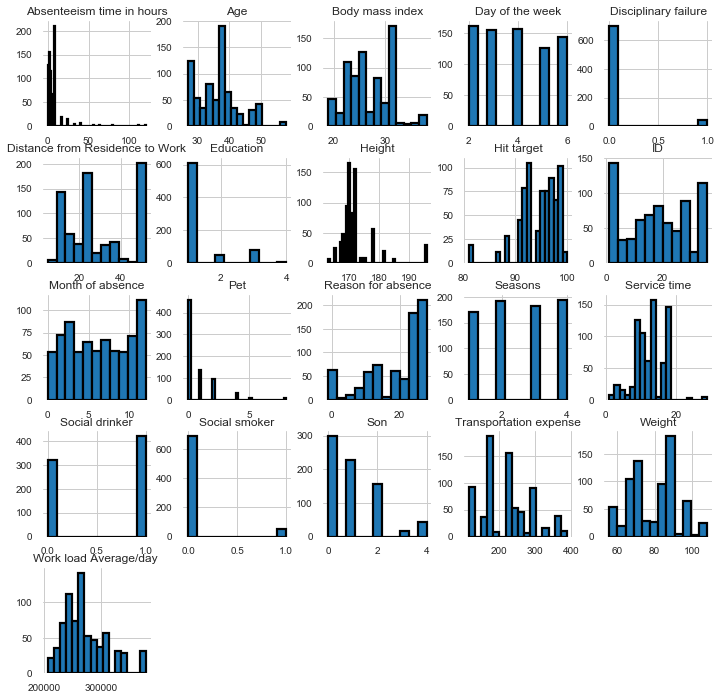

In [476]:
df.hist(edgecolor='black', linewidth=2.2, figsize=(12,12), bins='auto')
plt.show()

Above histogram plots show that all the variables are discrete in nature

In [348]:
#df = pd.DataFrame(columns=['Month_absence', 'Work_load','Hit_target', 'Absenteeism_hours'])
df = raw_xls_data.copy()

In [349]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


# Missing Value Analysis

In [350]:
pd.DataFrame(df.isnull().mean()*100, columns = ['percentage']).reset_index().sort_values('percentage', ascending=False)

,index,percentage
19,Body mass index,4.189189
20,Absenteeism time in hours,2.972973
18,Height,1.891892
9,Work load Average/day,1.351351
12,Education,1.351351
5,Transportation expense,0.945946
13,Son,0.810811
11,Disciplinary failure,0.810811
10,Hit target,0.810811
15,Social smoker,0.540541


In [351]:
df.cov()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,121.467891,-5.793705,0.073250,0.540063,1.206929,-165.689484,-79.324254,-13.072815,2.972883,4.045735e+04,0.705709,0.010202,-0.248819,0.087530,-2.469764,-0.032328,-0.602621,-35.889234,5.253856,-14.313125,-3.114769
Reason for absence,-5.793705,71.191283,-2.330167,1.381633,-1.095118,-67.283423,20.054996,1.854251,-4.228013,-4.379026e+04,2.751487,-1.026104,-0.254793,-0.543213,0.272197,-0.253521,-0.608769,0.167090,-4.069181,1.675334,-22.903696
Month of absence,0.073250,-2.330167,11.805736,-0.042334,1.552765,31.693227,-0.193256,-0.989145,0.027466,-2.215212e+04,-6.018442,0.081716,-0.156746,0.264360,0.092816,-0.034221,0.224247,0.831638,-1.425814,0.558651,1.216732
Day of the week,0.540063,1.381633,-0.042334,2.021159,0.073490,3.202700,2.454333,0.135388,0.064120,4.115294e+02,0.164503,-0.002327,0.054686,0.153051,0.029526,0.004729,-0.055581,-2.334593,-0.701619,-0.649210,-2.240731
Seasons,1.206929,-1.095118,1.552765,0.073490,1.236168,2.805851,-1.072050,-0.050121,-0.099316,6.632913e+03,-0.250055,0.036634,-0.002826,0.047706,-0.026038,-0.014678,0.020165,-0.392453,-0.225369,-0.025491,-0.020206
Transportation expense,-165.689484,-67.283423,31.693227,3.202700,2.805851,4482.862128,255.691794,-102.702490,-99.282628,3.459512e+03,-20.595229,1.646935,-2.459299,27.951456,4.638401,0.811406,35.233418,-180.986634,-79.689425,-39.132383,42.140189
Distance from Residence to Work,-79.324254,20.054996,-0.193256,2.454333,-1.072050,255.691794,220.466787,8.379786,-14.182454,-4.552454e+04,-0.799130,-0.220359,-2.668554,0.764526,3.323663,-0.299602,4.031469,-8.902669,-32.375137,7.534772,-20.554622
Service time,-13.072815,1.854251,-0.989145,0.135388,-0.050121,-102.702490,8.379786,19.270460,19.096643,2.292082e+03,-0.081528,-0.000870,-0.650539,-0.243573,0.775426,0.082450,-2.562642,25.718238,-1.529114,9.541674,0.978427
Age,2.972883,-4.228013,0.027466,0.064120,-0.099316,-99.282628,-14.182454,19.096643,41.992312,-9.235666e+03,-0.923884,0.153799,-0.991201,0.416498,0.687589,0.207427,-1.970333,34.902832,-2.650404,13.013786,6.816361
Work load Average/day,40457.349148,-43790.256405,-22152.121625,411.529380,6632.912885,3459.511845,-45524.538715,2292.082010,-9235.665911,1.519587e+09,-12974.276092,362.506526,-1855.841524,1368.167480,-639.315313,347.006188,-47.965295,-15266.598878,26130.381428,-12470.007899,14616.483899


***Imputation Note***
We tried initially with KNN imputation for all the predictor variables and mean imputation for 'Absenteeism time in hours'. After printing unique values for each variable, we found that there were new values coming in the distribution, thereby increasing the variance or complexity. Mean as well got the same issue like KNN and finally it is better to go for median imputation

We will consider 3 things while doing any imputation
1. The variance of the variables are preserved after imputation
2. The covariance of the variable wrt other variables is same after imputation
3. The probability distribution of the variables are not changed after doing imputation

In [352]:
df.var()

ID                                 1.214679e+02
Reason for absence                 7.119128e+01
Month of absence                   1.180574e+01
Day of the week                    2.021159e+00
Seasons                            1.236168e+00
Transportation expense             4.482862e+03
Distance from Residence to Work    2.204668e+02
Service time                       1.927046e+01
Age                                4.199231e+01
Work load Average/day              1.519587e+09
Hit target                         1.438461e+01
Disciplinary failure               5.037898e-02
Education                          4.582821e-01
Son                                1.198867e+00
Social drinker                     2.458225e-01
Social smoker                      6.807897e-02
Pet                                1.741678e+00
Weight                             1.656016e+02
Height                             3.697935e+01
Body mass index                    1.842829e+01
Absenteeism time in hours          1.816

In [353]:
#Imputation by median for missing Employee attributes
def Impute_Emp_Attributes(feature):
    groups = df.groupby(['ID'])
    for name, group in groups:
        print("ID", name)
        num_entries = group[feature].isnull().sum()
        median = group[feature].dropna().median()
        print("Median", median)   
        df.loc[(df['ID'] == name) & df[feature].isnull(), feature] = median
        print("Number of entries with NA filled", num_entries)

In [354]:
Impute_Emp_Attributes('Body mass index')
Impute_Emp_Attributes('Height')
Impute_Emp_Attributes('Education')
Impute_Emp_Attributes('Transportation expense')
Impute_Emp_Attributes('Son')
Impute_Emp_Attributes('Social smoker')
Impute_Emp_Attributes('Age')
Impute_Emp_Attributes('Service time')
Impute_Emp_Attributes('Distance from Residence to Work')
Impute_Emp_Attributes('Pet')
Impute_Emp_Attributes('Weight')
Impute_Emp_Attributes('Social drinker')

ID 1
Median 29.0
Number of entries with NA filled 0
ID 2
Median 33.0
Number of entries with NA filled 1
ID 3
Median 31.0
Number of entries with NA filled 3
ID 4
Median 34.0
Number of entries with NA filled 0
ID 5
Median 38.0
Number of entries with NA filled 1
ID 6
Median 25.0
Number of entries with NA filled 0
ID 7
Median 24.0
Number of entries with NA filled 0
ID 8
Median 35.0
Number of entries with NA filled 0
ID 9
Median 22.0
Number of entries with NA filled 0
ID 10
Median 27.0
Number of entries with NA filled 0
ID 11
Median 30.0
Number of entries with NA filled 3
ID 12
Median 21.0
Number of entries with NA filled 0
ID 13
Median 25.0
Number of entries with NA filled 1
ID 14
Median 25.0
Number of entries with NA filled 1
ID 15
Median 25.0
Number of entries with NA filled 1
ID 16
Median 25.0
Number of entries with NA filled 0
ID 17
Median 22.0
Number of entries with NA filled 1
ID 18
Median 25.0
Number of entries with NA filled 1
ID 19
Median 23.0
Number of entries with NA filled 1
ID

Number of entries with NA filled 1
ID 21
Median 0.0
Number of entries with NA filled 0
ID 22
Median 0.0
Number of entries with NA filled 0
ID 23
Median 2.0
Number of entries with NA filled 0
ID 24
Median 0.0
Number of entries with NA filled 0
ID 25
Median 0.0
Number of entries with NA filled 0
ID 26
Median 2.0
Number of entries with NA filled 0
ID 27
Median 0.0
Number of entries with NA filled 1
ID 28
Median 1.0
Number of entries with NA filled 0
ID 29
Median 2.0
Number of entries with NA filled 0
ID 30
Median 0.0
Number of entries with NA filled 0
ID 31
Median 0.0
Number of entries with NA filled 0
ID 32
Median 0.0
Number of entries with NA filled 0
ID 33
Median 2.0
Number of entries with NA filled 0
ID 34
Median 0.0
Number of entries with NA filled 2
ID 35
Median 1.0
Number of entries with NA filled 0
ID 36
Median 1.0
Number of entries with NA filled 0
ID 1
Median 0.0
Number of entries with NA filled 1
ID 2
Median 1.0
Number of entries with NA filled 0
ID 3
Median 0.0
Number of entri

ID 1
Median 1.0
Number of entries with NA filled 1
ID 2
Median 5.0
Number of entries with NA filled 0
ID 3
Median 0.0
Number of entries with NA filled 0
ID 4
Median 8.0
Number of entries with NA filled 0
ID 5
Median 0.0
Number of entries with NA filled 0
ID 6
Median 2.0
Number of entries with NA filled 0
ID 7
Median 0.0
Number of entries with NA filled 0
ID 8
Median 2.0
Number of entries with NA filled 0
ID 9
Median 1.0
Number of entries with NA filled 0
ID 10
Median 4.0
Number of entries with NA filled 0
ID 11
Median 1.0
Number of entries with NA filled 0
ID 12
Median 8.0
Number of entries with NA filled 0
ID 13
Median 0.0
Number of entries with NA filled 1
ID 14
Median 0.0
Number of entries with NA filled 0
ID 15
Median 1.0
Number of entries with NA filled 0
ID 16
Median 0.0
Number of entries with NA filled 0
ID 17
Median 0.0
Number of entries with NA filled 0
ID 18
Median 0.0
Number of entries with NA filled 0
ID 19
Median 0.0
Number of entries with NA filled 0
ID 20
Median 0.0
Numb

In [355]:
#Imputation by median for 'Absenteeism time in hours'
def Impute_Absent_hours():
    groups = df.groupby(['Month of absence', 'Work load Average/day ','Hit target'])
    for name, group in groups:
        print("Month", name[0])
        num_entries = group['Absenteeism time in hours'].isnull().sum()
        mode = group['Absenteeism time in hours'].dropna().mode()[0]
        print("Mode", mode)
        #group['Absenteeism time in hours'].fillna(mean, inplace = True)    
        df.loc[(df['Month of absence'] == name[0]) & (df['Work load Average/day '] == name[1]) & (df['Hit target'] == name[2]) & df['Absenteeism time in hours'].isnull(), 'Absenteeism time in hours'] = mode
        print("Number of entries with NA filled", num_entries)

In [356]:
Impute_Absent_hours()

Month 0.0
Mode 0.0
Number of entries with NA filled 0
Month 1.0
Mode 2.0
Number of entries with NA filled 0
Month 1.0
Mode 2.0
Number of entries with NA filled 0
Month 1.0
Mode 1.0
Number of entries with NA filled 0
Month 2.0
Mode 3.0
Number of entries with NA filled 0
Month 2.0
Mode 2.0
Number of entries with NA filled 0
Month 2.0
Mode 8.0
Number of entries with NA filled 0
Month 3.0
Mode 2.0
Number of entries with NA filled 0
Month 3.0
Mode 8.0
Number of entries with NA filled 3
Month 3.0
Mode 8.0
Number of entries with NA filled 0
Month 4.0
Mode 4.0
Number of entries with NA filled 0
Month 4.0
Mode 2.0
Number of entries with NA filled 0
Month 4.0
Mode 1.0
Number of entries with NA filled 0
Month 5.0
Mode 8.0
Number of entries with NA filled 0
Month 5.0
Mode 3.0
Number of entries with NA filled 0
Month 5.0
Mode 0.0
Number of entries with NA filled 1
Month 6.0
Mode 2.0
Number of entries with NA filled 0
Month 6.0
Mode 3.0
Number of entries with NA filled 0
Month 6.0
Mode 8.0
Number of

In [357]:
pd.DataFrame(df.isnull().mean()*100, columns = ['percentage']).reset_index().sort_values('percentage', ascending=False)

,index,percentage
9,Work load Average/day,1.351351
10,Hit target,0.810811
11,Disciplinary failure,0.810811
1,Reason for absence,0.405405
20,Absenteeism time in hours,0.270270
2,Month of absence,0.135135
5,Transportation expense,0.000000
6,Distance from Residence to Work,0.000000
7,Service time,0.000000
8,Age,0.000000


In [358]:
df[df['Work load Average/day '].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
55,36,0.0,9.0,3,4,118.0,13.0,18.0,50.0,NaN,92.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,NaN
77,11,26.0,10.0,4,4,289.0,36.0,13.0,33.0,NaN,93.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,8.0
84,15,23.0,11.0,5,4,291.0,31.0,12.0,40.0,NaN,93.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,5.0
93,20,28.0,11.0,6,4,260.0,50.0,11.0,36.0,NaN,93.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
104,34,19.0,12.0,3,4,118.0,10.0,10.0,37.0,NaN,97.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,56.0
105,10,22.0,12.0,4,4,361.0,52.0,3.0,28.0,NaN,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
113,28,23.0,1.0,4,2,225.0,26.0,9.0,28.0,NaN,95.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,1.0
114,34,19.0,1.0,2,2,118.0,10.0,10.0,37.0,NaN,95.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,1.0
132,27,23.0,1.0,5,2,184.0,42.0,7.0,27.0,NaN,95.0,0.0,1.0,0.0,0.0,0.0,0.0,58.0,167.0,21.0,2.0
219,10,22.0,5.0,6,3,361.0,52.0,3.0,28.0,NaN,92.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,NaN


In [372]:
df.loc[(df['Month of absence'] == 11) & (df['Work load Average/day '].isnull()), 'Work load Average/day '] = 306345

In [373]:
#Imputation by median for 'Work load Average/day'
groups = df.groupby(['Month of absence', 'Hit target'])
for name, group in groups:
    print("Month", name[0])
    num_entries = group['Work load Average/day '].isnull().sum()
    median = group['Work load Average/day '].dropna().median()
    print("Median", median)
    #group['Absenteeism time in hours'].fillna(mean, inplace = True)    
    df.loc[(df['Month of absence'] == name[0]) & (df['Hit target'] == name[1]) & df['Work load Average/day '].isnull(), 'Work load Average/day '] = median
    print("Number of entries with NA filled", num_entries)

Month 0.0
Median 271219.0
Number of entries with NA filled 0
Month 1.0
Median 308593.0
Number of entries with NA filled 3
Month 1.0
Median 313532.0
Number of entries with NA filled 0
Month 1.0
Median 330061.0
Number of entries with NA filled 0
Month 2.0
Median 251818.0
Number of entries with NA filled 0
Month 2.0
Median 264249.0
Number of entries with NA filled 0
Month 2.0
Median 302585.0
Number of entries with NA filled 0
Month 3.0
Median 343253.0
Number of entries with NA filled 0
Month 3.0
Median 244387.0
Number of entries with NA filled 0
Month 3.0
Median 222196.0
Number of entries with NA filled 0
Month 4.0
Median 246288.0
Number of entries with NA filled 0
Month 4.0
Median 326452.0
Number of entries with NA filled 0
Month 4.0
Median 239409.0
Number of entries with NA filled 0
Month 5.0
Median 378884.0
Number of entries with NA filled 1
Month 5.0
Median 237656.0
Number of entries with NA filled 0
Month 6.0
Median 377550.0
Number of entries with NA filled 0
Month 6.0
Median 253957.

In [375]:
pd.DataFrame(df.isnull().mean()*100, columns = ['percentage']).reset_index().sort_values('percentage', ascending=False)

,index,percentage
10,Hit target,0.810811
11,Disciplinary failure,0.810811
1,Reason for absence,0.405405
20,Absenteeism time in hours,0.270270
2,Month of absence,0.135135
4,Seasons,0.000000
13,Son,0.000000
19,Body mass index,0.000000
18,Height,0.000000
17,Weight,0.000000


In [376]:
#Imputation by median for 'Hit target'
groups = df.groupby(['Month of absence', 'Work load Average/day '])
for name, group in groups:
    print("Month", name[0])
    num_entries = group['Hit target'].isnull().sum()
    median = group['Hit target'].dropna().median()
    print("Median", median)
    #group['Absenteeism time in hours'].fillna(mean, inplace = True)    
    df.loc[(df['Month of absence'] == name[0]) & (df['Work load Average/day '] == name[1]) & df['Hit target'].isnull(), 'Hit target'] = median
    print("Number of entries with NA filled", num_entries)

Month 0.0
Median 95.0
Number of entries with NA filled 0
Month 1.0
Median 95.0
Number of entries with NA filled 3
Month 1.0
Median 96.0
Number of entries with NA filled 0
Month 1.0
Median 100.0
Number of entries with NA filled 0
Month 2.0
Median 96.0
Number of entries with NA filled 0
Month 2.0
Median 97.0
Number of entries with NA filled 0
Month 2.0
Median 99.0
Number of entries with NA filled 0
Month 3.0
Median 99.0
Number of entries with NA filled 0
Month 3.0
Median 98.0
Number of entries with NA filled 0
Month 3.0
Median 95.0
Number of entries with NA filled 0
Month 4.0
Median 98.0
Number of entries with NA filled 0
Month 4.0
Median 91.0
Number of entries with NA filled 0
Month 4.0
Median 96.0
Number of entries with NA filled 0
Month 5.0
Median 99.0
Number of entries with NA filled 0
Month 5.0
Median 99.0
Number of entries with NA filled 0
Month 5.0
Median 92.0
Number of entries with NA filled 0
Month 6.0
Median 95.0
Number of entries with NA filled 0
Month 6.0
Median 96.0
Number o

In [377]:
df.loc[(df['Reason for absence'] == 0) & df['Disciplinary failure'].isnull(), 'Disciplinary failure'] = 1
df.loc[df['Disciplinary failure'].isnull(), 'Disciplinary failure'] = 0

In [378]:
pd.DataFrame(df.isnull().mean()*100, columns = ['percentage']).reset_index().sort_values('percentage', ascending=False)

,index,percentage
1,Reason for absence,0.405405
20,Absenteeism time in hours,0.270270
2,Month of absence,0.135135
12,Education,0.000000
19,Body mass index,0.000000
18,Height,0.000000
17,Weight,0.000000
16,Pet,0.000000
15,Social smoker,0.000000
14,Social drinker,0.000000


In [379]:
df[df['Absenteeism time in hours'].isnull() | df['Month of absence'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
55,36,0.0,9.0,3,4,118.0,13.0,18.0,50.0,241476.0,92.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,NaN
66,3,23.0,NaN,6,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
219,10,22.0,5.0,6,3,361.0,52.0,3.0,28.0,378884.0,92.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,NaN


We can impute the missing data or drop them. Let us impute them

In [380]:
#Imputation for 'Month of absence'
df[(df['Work load Average/day '] ==253465) & (df['Hit target'] == 93)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
62,3,23.0,10.0,3,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
63,34,23.0,10.0,3,4,118.0,10.0,10.0,37.0,253465.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,3.0
64,36,0.0,10.0,4,4,118.0,13.0,18.0,50.0,253465.0,93.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,3.0
65,22,23.0,10.0,5,4,179.0,26.0,9.0,30.0,253465.0,93.0,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,19.0,1.0
66,3,23.0,NaN,6,4,179.0,51.0,18.0,38.0,253465.0,93.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
67,28,23.0,10.0,6,4,225.0,26.0,9.0,28.0,253465.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,3.0
68,34,23.0,10.0,3,4,118.0,10.0,10.0,37.0,253465.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,28.0,3.0
69,28,23.0,10.0,4,4,225.0,26.0,9.0,28.0,253465.0,93.0,0.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,24.0,2.0
70,33,23.0,10.0,4,4,248.0,25.0,14.0,47.0,253465.0,93.0,0.0,1.0,2.0,0.0,0.0,1.0,86.0,165.0,32.0,2.0
71,15,23.0,10.0,5,4,291.0,31.0,12.0,40.0,253465.0,93.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,25.0,5.0


In [381]:
df['Month of absence'].fillna(10, inplace=True)

In [382]:
#Imputation for 2 'Absenteeism hours'
Impute_Absent_hours()

Month 0.0
Mode 0.0
Number of entries with NA filled 0
Month 1.0
Mode 2.0
Number of entries with NA filled 0
Month 1.0
Mode 2.0
Number of entries with NA filled 0
Month 1.0
Mode 1.0
Number of entries with NA filled 0
Month 2.0
Mode 3.0
Number of entries with NA filled 0
Month 2.0
Mode 2.0
Number of entries with NA filled 0
Month 2.0
Mode 8.0
Number of entries with NA filled 0
Month 3.0
Mode 2.0
Number of entries with NA filled 0
Month 3.0
Mode 8.0
Number of entries with NA filled 0
Month 3.0
Mode 8.0
Number of entries with NA filled 0
Month 4.0
Mode 4.0
Number of entries with NA filled 0
Month 4.0
Mode 2.0
Number of entries with NA filled 0
Month 4.0
Mode 1.0
Number of entries with NA filled 0
Month 5.0
Mode 8.0
Number of entries with NA filled 0
Month 5.0
Mode 3.0
Number of entries with NA filled 0
Month 5.0
Mode 0.0
Number of entries with NA filled 1
Month 6.0
Mode 2.0
Number of entries with NA filled 0
Month 6.0
Mode 3.0
Number of entries with NA filled 0
Month 6.0
Mode 8.0
Number of

In [390]:
df[df['Reason for absence'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
367,3,NaN,1.0,4,2,179.0,51.0,18.0,38.0,330061.0,100.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
373,20,NaN,2.0,6,2,260.0,50.0,11.0,36.0,251818.0,96.0,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,3.0
380,6,NaN,2.0,2,2,189.0,29.0,13.0,33.0,251818.0,96.0,0.0,1.0,2.0,0.0,0.0,2.0,69.0,167.0,25.0,8.0


In [391]:
df.loc[df['Reason for absence'].isnull(), 'Reason for absence'] = -1

In [392]:
for col in df.columns:
    print_unique(df, col)

The number of unique values in the variable: ID
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
The number of unique values in the variable: Reason for absence
[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17. 18. 19. 21. 22. 23. 24. 25. 26. 27. 28.]
The number of unique values in the variable: Month of absence
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
The number of unique values in the variable: Day of the week
[2 3 4 5 6]
The number of unique values in the variable: Seasons
[1 2 3 4]
The number of unique values in the variable: Transportation expense
[118. 155. 157. 179. 184. 189. 225. 228. 231. 233. 235. 246. 248. 260.
 268. 279. 289. 291. 300. 330. 361. 369. 378. 388.]
The number of unique values in the variable: Distance from Residence to Work
[ 5. 10. 11. 12. 13. 14. 15. 16. 17. 20. 22. 25. 26. 27. 29. 31. 35. 36.
 42. 45. 48. 49. 50. 51. 52.]
The number of unique values in the 

In [384]:
df.cov()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,121.467891,-5.793705,-0.001646,0.540063,1.206929,-165.409048,-79.496893,-13.178894,2.920365,3.979985e+04,0.782623,0.011228,-0.269005,0.033497,-2.466006,-0.031054,-0.601755,-36.096694,5.079170,-14.496348,-3.466703
Reason for absence,-5.793705,71.191283,-2.308039,1.381633,-1.095118,-67.514429,19.834283,1.749735,-4.312491,-4.122724e+04,2.759299,-1.042859,-0.261872,-0.542221,0.266527,-0.252968,-0.611048,0.057685,-3.956666,1.348776,-21.616597
Month of absence,-0.001646,-2.308039,11.808068,-0.031891,1.557912,31.639871,-0.198186,-0.947189,-0.033829,-2.281512e+04,-5.979812,0.083934,-0.152982,0.298321,0.095783,-0.034524,0.216472,1.030538,-1.429726,0.751710,1.003292
Day of the week,0.540063,1.381633,-0.031891,2.021159,0.073490,3.235146,2.489524,0.132484,0.041069,8.687981e+02,0.166487,-0.004864,0.056007,0.153169,0.029441,0.004868,-0.054135,-2.362363,-0.704687,-0.631052,-2.179112
Seasons,1.206929,-1.095118,1.557912,0.073490,1.236168,2.753882,-1.041036,-0.053158,-0.087077,6.532956e+03,-0.256967,0.038182,-0.002209,0.057342,-0.025345,-0.014084,0.018111,-0.376400,-0.226374,-0.052560,-0.072653
Transportation expense,-165.409048,-67.514429,31.639871,3.235146,2.753882,4482.600197,260.441159,-102.718795,-98.700677,1.422069e+04,-20.291519,1.654683,-2.482032,28.168314,4.816662,0.772929,35.311217,-178.924997,-78.587317,-39.169411,43.421885
Distance from Residence to Work,-79.496893,19.834283,-0.198186,2.489524,-1.041036,260.441159,220.130291,8.570036,-14.023207,-3.979809e+04,-0.777429,-0.189774,-2.593117,0.883850,3.326043,-0.291040,4.027934,-9.148049,-31.640923,7.233868,-20.437404
Service time,-13.178894,1.749735,-0.947189,0.132484,-0.053158,-102.718795,8.570036,19.227115,19.061570,-1.144890e+02,-0.129924,-0.000219,-0.628790,-0.227005,0.767655,0.082654,-2.545112,25.758585,-1.406082,9.390283,1.160900
Age,2.920365,-4.312491,-0.033829,0.041069,-0.087077,-98.700677,-14.023207,19.061570,41.974493,-9.976488e+03,-0.960419,0.152909,-0.967794,0.405548,0.684709,0.205277,-1.974831,34.950338,-2.463126,13.068403,6.719012
Work load Average/day,39799.851073,-41227.238529,-22815.118312,868.798124,6532.955671,14220.689617,-39798.091757,-114.489047,-9976.487551,1.525536e+09,-13203.225012,256.528545,-1971.094437,1193.624774,-652.777749,314.810964,366.300684,-19383.820181,24352.901236,-15183.072805,10863.191899


The covariance matrix looks identical after imputation, let us look at the histograms

df['Reason for absence'] = df['Reason for absence'].astype('category') #We shall recode the 'Reason for absence' as a category

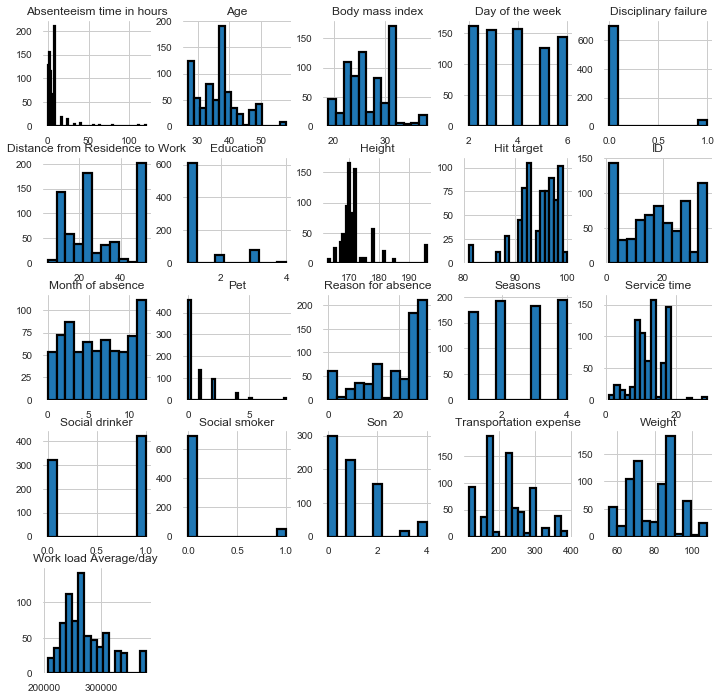

In [387]:
df.hist(edgecolor='black', linewidth=2.2, figsize=(12,12), bins = 'auto')
plt.show()

We see that the target variable is highly skewed. Work load Average/day and Hit target are less skewed and Month of absence is not skewed

# Setting the Checkpoint after imputation

In [393]:
df2 = df.copy()
df.to_csv("Employee Absenteeism Imputation.csv", index=False)

# Using chi square tests and eliminating observations

In [395]:
def print_chi_sq_tests(df_test):
    for col in df_test.columns:
        stat, p, dof, expected = chi2_contingency(pd.crosstab(df_test['Absenteeism time in hours'],df_test[col]))
        print("Chi Sq test for features...........", col)
        print(stat)
        print(p)    

In [396]:
print_chi_sq_tests(df2)

Chi Sq test for features........... ID
889.2453819016475
3.815031774677936e-11
Chi Sq test for features........... Reason for absence
1656.032873284991
1.1805219347568775e-122
Chi Sq test for features........... Month of absence
359.71824497828754
2.8944754330752625e-09
Chi Sq test for features........... Day of the week
103.87669508720488
0.008287792011308939
Chi Sq test for features........... Seasons
122.5974320111169
3.0053076994296445e-07
Chi Sq test for features........... Transportation expense
697.0521607127151
9.406544679138365e-17
Chi Sq test for features........... Distance from Residence to Work
721.8301626052225
6.626733002732717e-17
Chi Sq test for features........... Service time
415.04671629021135
3.1920877098617734e-05
Chi Sq test for features........... Age
592.5256190584283
1.0231171439551832e-11
Chi Sq test for features........... Work load Average/day 
960.8794673589287
4.611084344149994e-13
Chi Sq test for features........... Hit target
311.5771325961067
2.1957618

We will drop Education and Social Smoker since p-values are not smaller than 0.05. But significantly lower p-values are 'Reason for absence' and 'Disciplinary failure'

In [397]:
df2 = df2.drop(['Education','Social smoker'], axis = 1)

In [398]:
df2['Reason for absence'].value_counts()

 23.0    149
 28.0    110
 27.0     69
 13.0     55
 0.0      43
 19.0     40
 22.0     37
 26.0     33
 25.0     31
 11.0     26
 10.0     25
 18.0     21
 14.0     19
 1.0      16
 7.0      15
 12.0      8
 6.0       8
 8.0       6
 21.0      6
 9.0       4
 5.0       3
 24.0      3
-1.0       3
 16.0      3
 15.0      2
 4.0       2
 17.0      1
 2.0       1
 3.0       1
Name: Reason for absence, dtype: int64

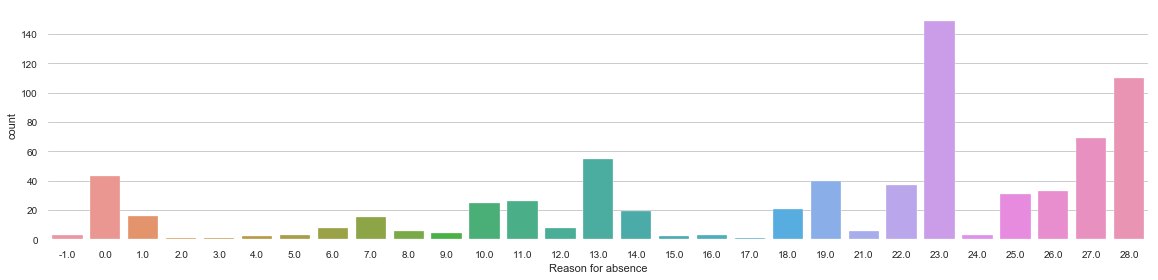

In [394]:
sns.set_style("whitegrid")

sns.catplot(data=df2, x='Reason for absence', kind = 'count', height=4,aspect=4)

In [399]:
df2['Disciplinary failure'].value_counts()

0.0    700
1.0     40
Name: Disciplinary failure, dtype: int64

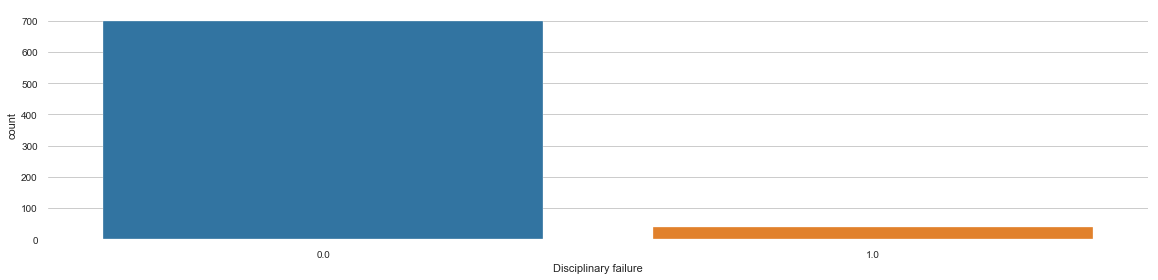

In [485]:
sns.catplot(data=df2, x='Disciplinary failure', kind = 'count', height=4,aspect=4)

In [400]:
np.percentile(df2['Reason for absence'].value_counts().values,[90])

array([57.8])

***Reason for absence in [23,27,28] are contributing to more number of absentees***

In [401]:
df3 = df2[(df2['Reason for absence'] == 23) | (df2['Reason for absence'] == 28) | (df2['Reason for absence'] == 27)]

In [402]:
df3.shape

(328, 19)

In [403]:
df3[df3['Disciplinary failure'] == 1]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


Disciplinary failure = 0 are within the filtered observations contributing more number of absentees

In [404]:
df3 = df3.drop(['Reason for absence', 'Disciplinary failure'], axis = 1)

In [405]:
print_chi_sq_tests(df3)

Chi Sq test for features........... ID
332.12499465433973
6.269475251322483e-07
Chi Sq test for features........... Month of absence
142.29129722332132
0.00022175251549340464
Chi Sq test for features........... Day of the week
34.704861371063146
0.3402020386876126
Chi Sq test for features........... Seasons
64.8447952055207
1.2826957190186773e-05
Chi Sq test for features........... Transportation expense
247.69397736079668
1.6038659403946965e-08
Chi Sq test for features........... Distance from Residence to Work
265.13558001976423
3.389668904893843e-07
Chi Sq test for features........... Service time
218.2666068694327
1.1492810417805194e-06
Chi Sq test for features........... Age
242.81609988283606
3.992498695754827e-06
Chi Sq test for features........... Work load Average/day 
398.42892972840764
4.070080102567428e-06
Chi Sq test for features........... Hit target
168.86593903122395
6.381792655333278e-06
Chi Sq test for features........... Son
124.47161226449576
7.628603607064547e-13
C

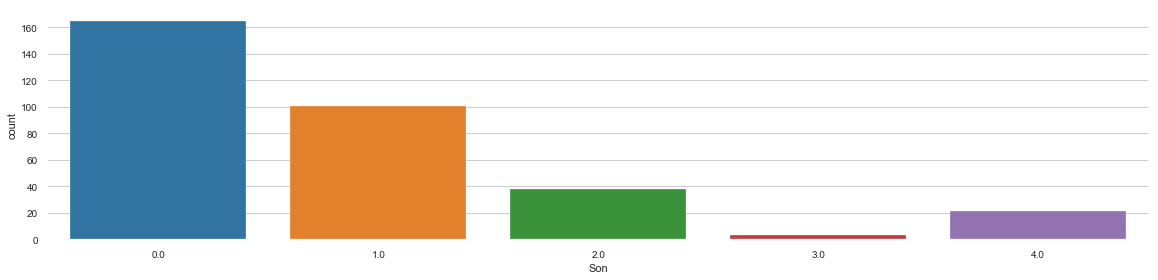

In [477]:
sns.catplot(data=df3, x='Son', kind = 'count', height=4,aspect=4)

In [406]:
df3['Son'].value_counts()

0.0    165
1.0    101
2.0     38
4.0     21
3.0      3
Name: Son, dtype: int64

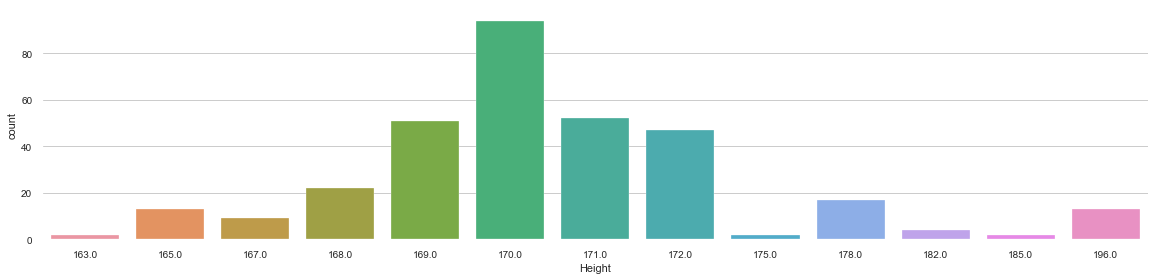

In [479]:
sns.catplot(data=df3, x='Height', kind = 'count', height=4,aspect=4)

In [438]:
df3['Height'].value_counts()

170.0    94
171.0    52
169.0    51
172.0    47
168.0    22
178.0    17
196.0    13
165.0    13
167.0     9
182.0     4
175.0     2
163.0     2
185.0     2
Name: Height, dtype: int64

In [440]:
np.percentile(df3['Height'].value_counts().values,[90])

array([51.8])

In [408]:
df3[(df3['Son'] == 0) | (df3['Son'] == 1)].shape

(266, 17)

***Here we see that employees with 0 or 1 number of Sons are contributing to more number of absentees and Height in 170, 171 are contributing to more number of absentees***

In [441]:
df4 = df3[(df3['Son'] == 0) | (df3['Son'] == 1) | (df3['Height'] == 170) | (df3['Height'] == 171)]

In [442]:
df4 = df4.drop(['Day of the week','Pet','Body mass index','Son', 'Height'], axis = 1)

In [443]:
print_chi_sq_tests(df4)

Chi Sq test for features........... ID
160.14696733964365
0.07702939692007128
Chi Sq test for features........... Month of absence
129.95303996966217
0.0024469776330491608
Chi Sq test for features........... Seasons
62.58652529673983
2.7310607157995167e-05
Chi Sq test for features........... Transportation expense
94.05365786096962
0.13481098400624203
Chi Sq test for features........... Distance from Residence to Work
135.867906613664
0.15270320074873878
Chi Sq test for features........... Service time
114.43414501918697
0.22768907060147142
Chi Sq test for features........... Age
104.9306895868834
0.2503704055396815
Chi Sq test for features........... Work load Average/day 
392.1338705699634
2.4346970652230627e-06
Chi Sq test for features........... Hit target
151.54678143747674
0.000260848793349091
Chi Sq test for features........... Social drinker
12.76251183205612
0.12028627152459102
Chi Sq test for features........... Weight
143.59727302810728
0.06999475993823973
Chi Sq test for fe

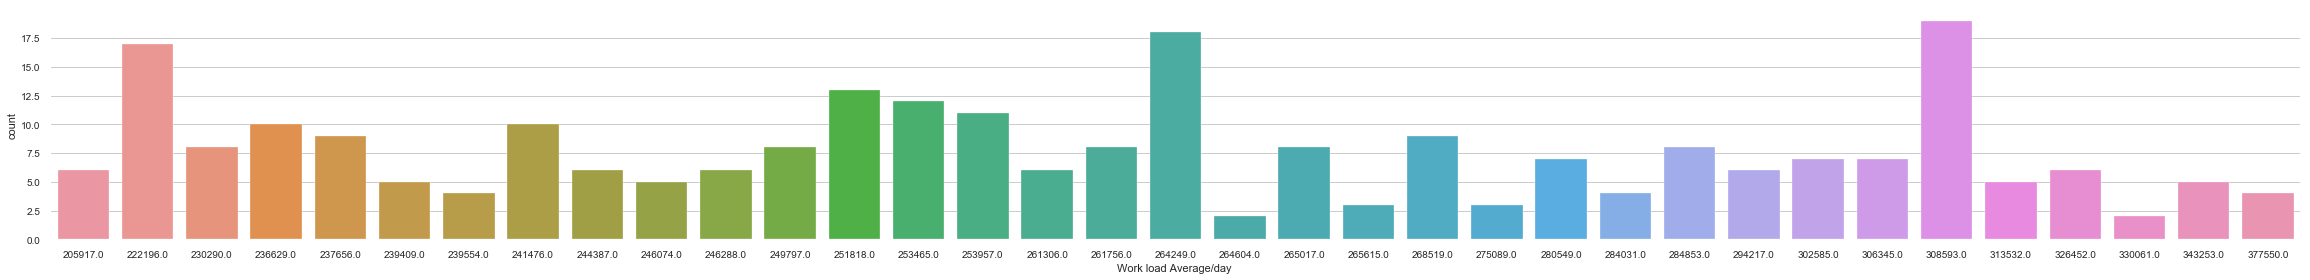

In [482]:
sns.catplot(data=df4, x='Work load Average/day ', kind = 'count', height=4,aspect=8)

In [444]:
df4['Work load Average/day '].value_counts()

308593.0    19
264249.0    18
222196.0    17
251818.0    13
253465.0    12
253957.0    11
236629.0    10
241476.0    10
237656.0     9
268519.0     9
230290.0     8
249797.0     8
261756.0     8
265017.0     8
284853.0     8
302585.0     7
306345.0     7
280549.0     7
294217.0     6
246288.0     6
326452.0     6
244387.0     6
205917.0     6
261306.0     6
239409.0     5
343253.0     5
246074.0     5
313532.0     5
284031.0     4
239554.0     4
377550.0     4
265615.0     3
275089.0     3
330061.0     2
264604.0     2
Name: Work load Average/day , dtype: int64

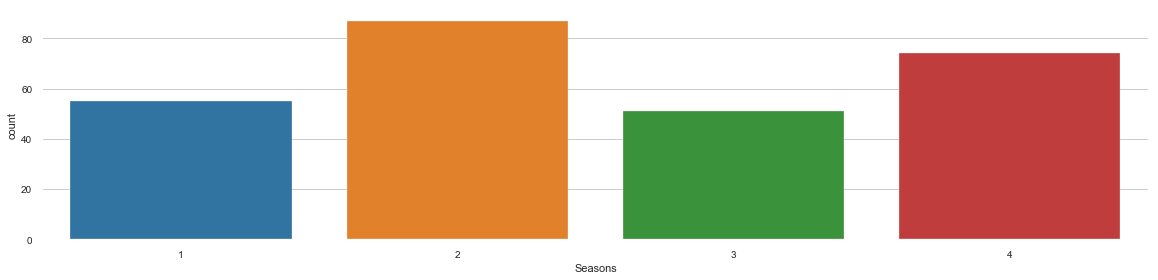

In [483]:
sns.catplot(data=df4, x='Seasons', kind = 'count', height=4,aspect=4)

In [445]:
df4['Seasons'].value_counts()

2    87
4    74
1    55
3    51
Name: Seasons, dtype: int64

In [446]:
np.percentile(df4['Work load Average/day '].value_counts().values,[90])

array([12.6])

In [447]:
np.percentile(df4['Seasons'].value_counts().values,[90])

array([83.1])

***Work load Average/day in (308593,264249,222196,251818) are contributing to more number of absentees. Also Season 2 is contributing to more number of absentees***

In [448]:
df5 = df4[(df4['Work load Average/day '] == 308593) | (df4['Work load Average/day '] ==264249) | (df4['Work load Average/day '] ==222196) | (df4['Work load Average/day '] ==251818.0) | (df4['Seasons'] == 2)]
df5

,ID,Month of absence,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Social drinker,Weight,Absenteeism time in hours
112,28,12.0,2,225.0,26.0,9.0,28.0,261306.0,97.0,0.0,69.0,2.0
113,28,1.0,2,225.0,26.0,9.0,28.0,308593.0,95.0,0.0,69.0,1.0
115,34,1.0,2,118.0,10.0,10.0,37.0,308593.0,95.0,0.0,83.0,1.0
117,28,1.0,2,225.0,26.0,9.0,28.0,308593.0,95.0,0.0,69.0,2.0
118,27,1.0,2,184.0,42.0,7.0,27.0,308593.0,95.0,0.0,58.0,2.0
119,28,1.0,2,225.0,26.0,9.0,28.0,308593.0,95.0,0.0,69.0,2.0
120,28,1.0,2,225.0,26.0,9.0,28.0,308593.0,95.0,0.0,69.0,1.0
121,34,1.0,2,118.0,10.0,10.0,37.0,308593.0,95.0,0.0,83.0,2.0
122,28,1.0,2,225.0,26.0,9.0,28.0,308593.0,95.0,0.0,69.0,2.0
123,34,1.0,2,118.0,10.0,10.0,37.0,308593.0,95.0,0.0,83.0,2.0


In [449]:
df6 = df5.drop(['Work load Average/day ','Seasons','Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Social drinker'], axis = 1)

In [450]:
print_chi_sq_tests(df6)

Chi Sq test for features........... ID
75.46066636851522
0.08607643619703208
Chi Sq test for features........... Month of absence
18.547700161130894
0.42015756388824266
Chi Sq test for features........... Hit target
110.0194055944056
2.0035204983634793e-09
Chi Sq test for features........... Weight
75.4606663685152
0.08607643619703223
Chi Sq test for features........... Absenteeism time in hours
540.0
3.5541375936938067e-91


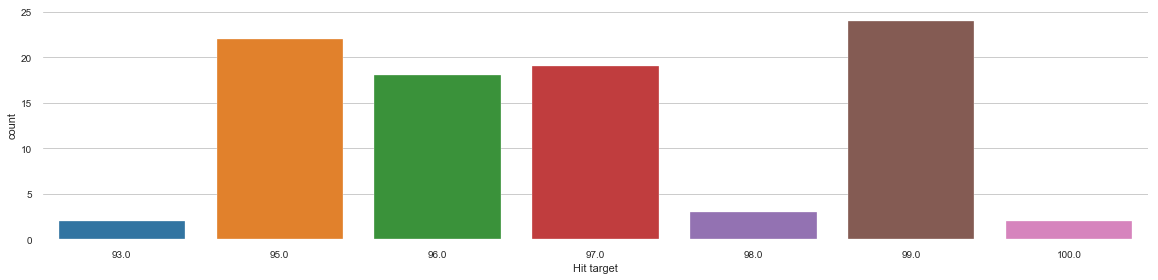

In [484]:
sns.catplot(data=df6, x='Hit target', kind = 'count', height=4,aspect=4)

In [451]:
df6['Hit target'].value_counts()

99.0     24
95.0     22
97.0     19
96.0     18
98.0      3
100.0     2
93.0      2
Name: Hit target, dtype: int64

In [452]:
df7 = df6[(df6['Hit target'] == 99) | (df6['Hit target'] == 95) | (df6['Hit target'] == 96) | (df6['Hit target'] == 97)]
df7

,ID,Month of absence,Hit target,Weight,Absenteeism time in hours
112,28,12.0,97.0,69.0,2.0
113,28,1.0,95.0,69.0,1.0
115,34,1.0,95.0,83.0,1.0
117,28,1.0,95.0,69.0,2.0
118,27,1.0,95.0,58.0,2.0
119,28,1.0,95.0,69.0,2.0
120,28,1.0,95.0,69.0,1.0
121,34,1.0,95.0,83.0,2.0
122,28,1.0,95.0,69.0,2.0
123,34,1.0,95.0,83.0,2.0


**Finally Hit Target in (99,95,96,97) contributing to more number of absentees**

In [453]:
df7 = df7.drop(['Hit target', 'Month of absence'], axis = 1)

In [455]:
print_chi_sq_tests(df7)

Chi Sq test for features........... ID
68.1023527914166
0.0009697193469288816
Chi Sq test for features........... Weight
68.10235279141662
0.0009697193469288751
Chi Sq test for features........... Absenteeism time in hours
332.0
5.808103689737695e-61


# Summary

After running quite a few chi square tests for contingency, we found below the following patterns <br>
1) Reason for absence in [23,27,28], medical consultation, physiotherapy and dental consultation are the major reason for employee absenteeism with all of them having Disciplinary failure as 0. HR could provide within company these types of consultations to their employees <br>
2) Employees with 0 or 1 number of Sons and Height of (170,171) are contributing to more number of absentees.<br>
3) Work Load average per day in [308593,264249,222196,251818] are contributing to more number of absentees as well Season 2 'Autumn' is contributing to more number of absentees <br>
4) Hit Target in (99,95,96,97) contributing to more number of absentees

In [486]:
df.groupby(['Month of absence', 'Work load Average/day ', 'Hit target'], sort= False)['Absenteeism time in hours'].sum()

Month of absence  Work load Average/day   Hit target
7.0               239554.0                97.0          135.0
8.0               205917.0                92.0          140.0
9.0               241476.0                92.0           89.0
10.0              253465.0                93.0           77.0
11.0              306345.0                93.0          161.0
12.0              261306.0                97.0          177.0
1.0               308593.0                95.0           60.0
2.0               302585.0                99.0           87.0
3.0               343253.0                95.0          281.0
4.0               326452.0                96.0          194.0
5.0               378884.0                92.0           83.0
6.0               377550.0                94.0          191.0
7.0               275312.0                98.0          137.0
8.0               265615.0                94.0           65.0
9.0               294217.0                81.0          163.0
10.0             

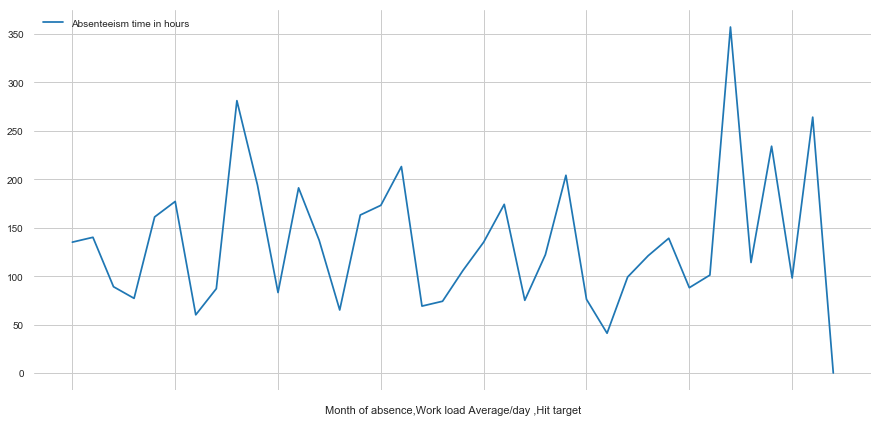

In [473]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Month of absence', 'Work load Average/day ', 'Hit target'], sort= False)['Absenteeism time in hours'].sum().plot(legend = True,ax=ax)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Dummy Sections~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [226]:
df['Work load Average/day '].value_counts()

222196.0    36
264249.0    33
237656.0    32
343253.0    29
265017.0    28
268519.0    25
284853.0    25
308593.0    24
284031.0    22
241476.0    22
244387.0    22
251818.0    21
205917.0    21
326452.0    20
246288.0    20
230290.0    20
236629.0    19
275089.0    19
294217.0    19
239554.0    19
253957.0    19
253465.0    18
265615.0    18
302585.0    18
246074.0    16
306345.0    16
378884.0    16
377550.0    16
275312.0    16
313532.0    15
261306.0    15
249797.0    15
280549.0    15
239409.0    13
264604.0    12
261756.0    12
330061.0    11
271219.0     3
Name: Work load Average/day , dtype: int64